In [1]:
from models.transformer_only import visualize_attention

model_name = 'pd-hek293t-pe2'
attentions, counts = visualize_attention(percentage=1, model_name=model_name, num_encoder_units=3, annot=True, onehot=True)

# save the attention matrix
import numpy as np

np.save(f'attentions-{model_name}-transformer-only.npy', attentions)
np.save(f'counts-{model_name}-transformer-only.npy', counts)

FileNotFoundError: [Errno 2] No such file or directory: 'models/trained-models/transformer/pd-hek293t-pe2-fold-1-transformer-only.pt'

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0 1926 1723 1713 1886 1399  695 1046
  881 1287 1170 1167 1236 1066  999 1053 1177 1068  984  799  803  735
  623  649  741  531  478  426  365  321  252    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
21 50
Attention weights for edit type replace


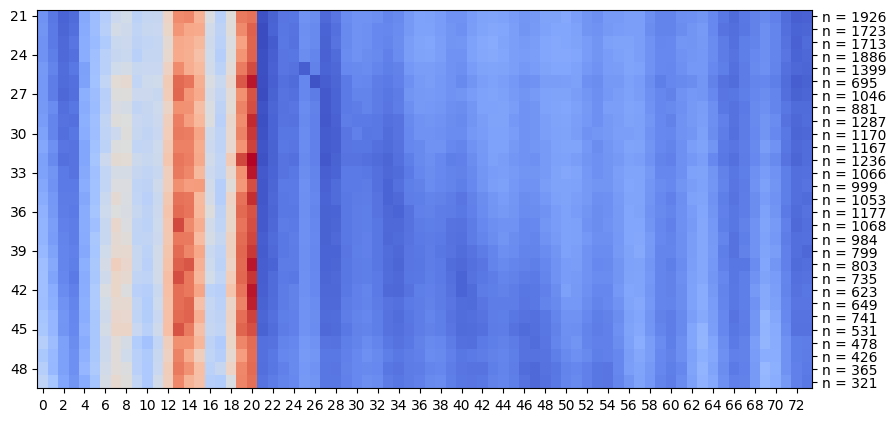

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 574 625 573 733 976 110 597 614 508 465 389 446 391 343 449
 313 264 279 244 214 212 199 164 177 148 156 113 103 104  73   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
21 50
Attention weights for edit type insertion


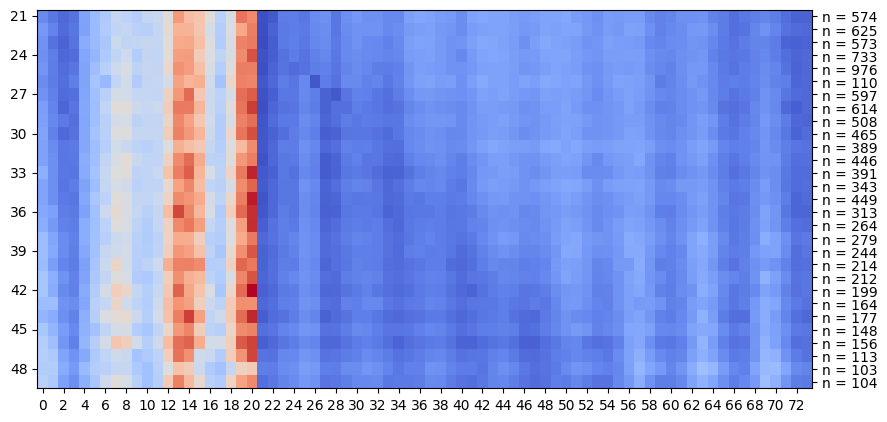

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 360 480 417 519 478 497 545 389 328 332 398 254 306 294 236
 211 164 176 176 158 164 118 106 117 114  75  98  50  60  60   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
21 50
Attention weights for edit type deletion


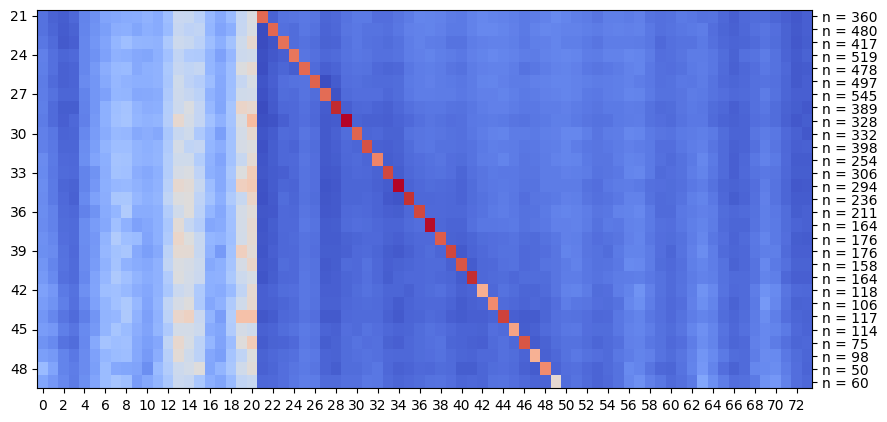

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from os.path import join as pjoin

model_name = 'dp-hek293t-pe2'

attentions = np.load(f'attentions-{model_name}-transformer-only.npy', allow_pickle=True)
counts = np.load(f'counts-{model_name}-transformer-only.npy', allow_pickle=True)


num_heads = 2
# plot the attention weights for each head and edit type
# plot the attention weights for each head and edit type
for i, data in enumerate(['replace', 'insertion', 'deletion']):
    # y lim is where the count value is larger than 0
    y_lim_lower = 0
    y_lim_upper = 0
    for ind, c in enumerate(counts[i]):
        if c > 0 and y_lim_lower == 0:
            y_lim_lower = ind
        if c > 0:
            y_lim_upper = ind
    y_lim = (y_lim_upper, y_lim_lower)
    fig_size_y = 10 * (y_lim_upper - y_lim_lower) / 74
    
    fig, ax = plt.subplots(1, 1, figsize=(10, fig_size_y+1))
    # highlight the diagonal
    sns.heatmap(attentions[i], cmap='coolwarm', ax=ax, annot=False, cbar=False)
    # remove the part of the heatmap with nan values
    ax.set_ylim(y_lim)
    # additional y axis ticks on the right showing the counts
    ax2 = ax.twinx()
    print(counts[i])
    print(y_lim_lower, y_lim_upper)
    ax2.set_yticks(np.arange(len(counts[i])) + 0.5)
    ax2.set_yticklabels([f'n = {c}' for c in counts[i]])
    ax2.set_ylim(y_lim)
    print(f'Attention weights for edit type {data}')
    plt.show()
    # save the plots
    fig.savefig(pjoin('dissertation', 'figures', f'{model_name}-transformer-only-attention-{data}-1bp.png'), bbox_inches='tight', dpi=300)

In [6]:
from models.transformer import visualize_attention

model_name = 'dp-hek293t-pe2'
attentions, counts = visualize_attention(percentage=0.01, model_name=model_name, num_encoder_units=3, annot=False, onehot=True)

# save the attention matrix
import numpy as np
np.save(f'attentions-{model_name}-transformer.npy', attentions)
np.save(f'counts-{model_name}-transformer.npy', counts)

RuntimeError: Error(s) in loading state_dict for PrimeDesignTransformer:
	size mismatch for transformer.encoder.layers.0.self_attn.linears.0.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.0.self_attn.linears.0.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.0.self_attn.linears.1.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.0.self_attn.linears.1.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.0.self_attn.linears.2.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.0.self_attn.linears.2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.0.self_attn.linears.3.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.0.self_attn.linears.3.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.0.feed_forward.linear1.weight: copying a param with shape torch.Size([100, 6]) from checkpoint, the shape in current model is torch.Size([100, 4]).
	size mismatch for transformer.encoder.layers.0.feed_forward.linear2.weight: copying a param with shape torch.Size([6, 100]) from checkpoint, the shape in current model is torch.Size([4, 100]).
	size mismatch for transformer.encoder.layers.0.feed_forward.linear2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.0.sublayer.0.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.0.sublayer.0.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.0.sublayer.1.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.0.sublayer.1.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.1.self_attn.linears.0.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.1.self_attn.linears.0.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.1.self_attn.linears.1.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.1.self_attn.linears.1.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.1.self_attn.linears.2.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.1.self_attn.linears.2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.1.self_attn.linears.3.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.1.self_attn.linears.3.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.1.feed_forward.linear1.weight: copying a param with shape torch.Size([100, 6]) from checkpoint, the shape in current model is torch.Size([100, 4]).
	size mismatch for transformer.encoder.layers.1.feed_forward.linear2.weight: copying a param with shape torch.Size([6, 100]) from checkpoint, the shape in current model is torch.Size([4, 100]).
	size mismatch for transformer.encoder.layers.1.feed_forward.linear2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.1.sublayer.0.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.1.sublayer.0.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.1.sublayer.1.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.1.sublayer.1.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.2.self_attn.linears.0.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.2.self_attn.linears.0.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.2.self_attn.linears.1.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.2.self_attn.linears.1.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.2.self_attn.linears.2.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.2.self_attn.linears.2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.2.self_attn.linears.3.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.2.self_attn.linears.3.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.2.feed_forward.linear1.weight: copying a param with shape torch.Size([100, 6]) from checkpoint, the shape in current model is torch.Size([100, 4]).
	size mismatch for transformer.encoder.layers.2.feed_forward.linear2.weight: copying a param with shape torch.Size([6, 100]) from checkpoint, the shape in current model is torch.Size([4, 100]).
	size mismatch for transformer.encoder.layers.2.feed_forward.linear2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.2.sublayer.0.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.2.sublayer.0.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.2.sublayer.1.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.2.sublayer.1.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.self_attn.linears.0.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.0.self_attn.linears.0.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.self_attn.linears.1.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.0.self_attn.linears.1.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.self_attn.linears.2.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.0.self_attn.linears.2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.self_attn.linears.3.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.0.self_attn.linears.3.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.cross_attn.linears.0.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.0.cross_attn.linears.0.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.cross_attn.linears.1.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.0.cross_attn.linears.1.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.cross_attn.linears.2.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.0.cross_attn.linears.2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.cross_attn.linears.3.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.0.cross_attn.linears.3.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.feed_forward.linear1.weight: copying a param with shape torch.Size([100, 6]) from checkpoint, the shape in current model is torch.Size([100, 4]).
	size mismatch for transformer.decoder.layers.0.feed_forward.linear2.weight: copying a param with shape torch.Size([6, 100]) from checkpoint, the shape in current model is torch.Size([4, 100]).
	size mismatch for transformer.decoder.layers.0.feed_forward.linear2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.sublayer.0.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.sublayer.0.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.sublayer.1.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.sublayer.1.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.sublayer.2.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.sublayer.2.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.self_attn.linears.0.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.1.self_attn.linears.0.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.self_attn.linears.1.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.1.self_attn.linears.1.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.self_attn.linears.2.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.1.self_attn.linears.2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.self_attn.linears.3.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.1.self_attn.linears.3.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.cross_attn.linears.0.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.1.cross_attn.linears.0.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.cross_attn.linears.1.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.1.cross_attn.linears.1.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.cross_attn.linears.2.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.1.cross_attn.linears.2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.cross_attn.linears.3.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.1.cross_attn.linears.3.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.feed_forward.linear1.weight: copying a param with shape torch.Size([100, 6]) from checkpoint, the shape in current model is torch.Size([100, 4]).
	size mismatch for transformer.decoder.layers.1.feed_forward.linear2.weight: copying a param with shape torch.Size([6, 100]) from checkpoint, the shape in current model is torch.Size([4, 100]).
	size mismatch for transformer.decoder.layers.1.feed_forward.linear2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.sublayer.0.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.sublayer.0.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.sublayer.1.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.sublayer.1.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.sublayer.2.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.sublayer.2.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.self_attn.linears.0.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.2.self_attn.linears.0.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.self_attn.linears.1.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.2.self_attn.linears.1.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.self_attn.linears.2.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.2.self_attn.linears.2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.self_attn.linears.3.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.2.self_attn.linears.3.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.cross_attn.linears.0.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.2.cross_attn.linears.0.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.cross_attn.linears.1.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.2.cross_attn.linears.1.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.cross_attn.linears.2.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.2.cross_attn.linears.2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.cross_attn.linears.3.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.2.cross_attn.linears.3.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.feed_forward.linear1.weight: copying a param with shape torch.Size([100, 6]) from checkpoint, the shape in current model is torch.Size([100, 4]).
	size mismatch for transformer.decoder.layers.2.feed_forward.linear2.weight: copying a param with shape torch.Size([6, 100]) from checkpoint, the shape in current model is torch.Size([4, 100]).
	size mismatch for transformer.decoder.layers.2.feed_forward.linear2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.sublayer.0.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.sublayer.0.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.sublayer.1.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.sublayer.1.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.sublayer.2.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.sublayer.2.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.wt_embed.position_encoding: copying a param with shape torch.Size([1, 99, 6]) from checkpoint, the shape in current model is torch.Size([1, 99, 4]).
	size mismatch for transformer.mut_embed.position_encoding: copying a param with shape torch.Size([1, 99, 6]) from checkpoint, the shape in current model is torch.Size([1, 99, 4]).
	size mismatch for transformer_pool.queryv: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for head.0.weight: copying a param with shape torch.Size([134]) from checkpoint, the shape in current model is torch.Size([132]).
	size mismatch for head.0.bias: copying a param with shape torch.Size([134]) from checkpoint, the shape in current model is torch.Size([132]).
	size mismatch for head.2.weight: copying a param with shape torch.Size([1, 134]) from checkpoint, the shape in current model is torch.Size([1, 132]).

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model_name = 'dp-hek293t-pe2'

attentions = np.load(f'attentions-{model_name}-transformer-only.npy', allow_pickle=True)
counts = np.load(f'counts-{model_name}-transformer-only.npy', allow_pickle=True)


num_heads = 2
# plot the attention weights for each head and edit type
# plot the attention weights for each head and edit type
for i, data in enumerate(['replace', 'insertion', 'deletion']):
    # y lim is where the count value is larger than 0
    y_lim_lower = 0
    y_lim_upper = 0
    for ind, c in enumerate(counts[i]):
        if ind == 0: continue
        if c > 0 and y_lim_lower == 0:
            y_lim_lower = ind
        if c > 0:
            y_lim_upper = ind
    y_lim = (y_lim_upper, y_lim_lower)
    fig_size_y = 10 * (y_lim_upper - y_lim_lower) / 74
    
    for j in range(num_heads):
        for layer in range(3):
            fig, ax = plt.subplots(1, 1, figsize=(10, fig_size_y+1))
            # highlight the diagonal
            sns.heatmap(attentions[i][layer][j], cmap='coolwarm', ax=ax, annot=False, cbar=False)
            # remove the part of the heatmap with nan values
            ax.set_ylim(y_lim)
            # additional y axis ticks on the right showing the counts
            ax2 = ax.twinx()
            print(counts[i])
            ax2.set_yticks(np.arange(len(counts[i])) + 0.5)
            ax2.set_yticklabels([f'n = {c}' for c in counts[i]])
            ax2.set_ylim(y_lim)
            print(f'Attention weights for head {j} and edit type {data} at layer {layer}')
            plt.show()